# Understanding audio processing with librosa

## 1. Import Dependencies

Before we begin, we need to import the essential Python libraries that will be used throughout this project:

- **Librosa** → for audio loading, analysis, and signal processing  
- **IPython.display** → for playing audio directly in notebooks  
- **Matplotlib** → for data visualization and plotting  
- **NumPy** → for array-based operations  
- **scikit-learn (sklearn)** → for preprocessing, normalization, and other machine learning utilities
- **warnings** → for supressing warnings

The code below imports these libraries and prints a confirmation message once the imports are complete.


In [42]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import warnings
warnings.filterwarnings('ignore')
print("Imports complete")

Imports complete


## 2. Load the Audio File

In this step, we load an audio file using **Librosa**. We specify:

- `audio_path` → path to the audio file (`.mp3`, `.wav`, etc.)  
- `offset` → start reading from 30 seconds into the file  
- `duration` → read only 10 seconds of audio  

After loading, Librosa returns:

- `x` → the audio time series as a NumPy array  
- `sr` → the sample rate of the audio

We also print the **types, shape, and values** to inspect the loaded data.


In [48]:
audio_path = 'benee-beach.wav'
x, sr = librosa.load(audio_path,offset=30.0,duration=10)
print(f"x - {type(x)}\nsr - {type(sr)}")
print(f"Shape of x: {x.shape}\nValue of sr: {sr}\nValue of x: {x}")

x - <class 'numpy.ndarray'>
sr - <class 'int'>
Shape of x: (220500,)
Value of sr: 22050
Value of x: [-0.21847525 -0.2952228  -0.28723493 ...  0.23577718  0.16443698
  0.06488547]


## 3. Visualize and Play the Audio

Now that we have loaded the audio, we can:

1. **Visualize the waveform** using Matplotlib and Librosa.  
2. **Play the audio directly** in the notebook using IPython's `Audio` class.  

This helps us **see the amplitude variations over time** and **listen** to the segment we just loaded.


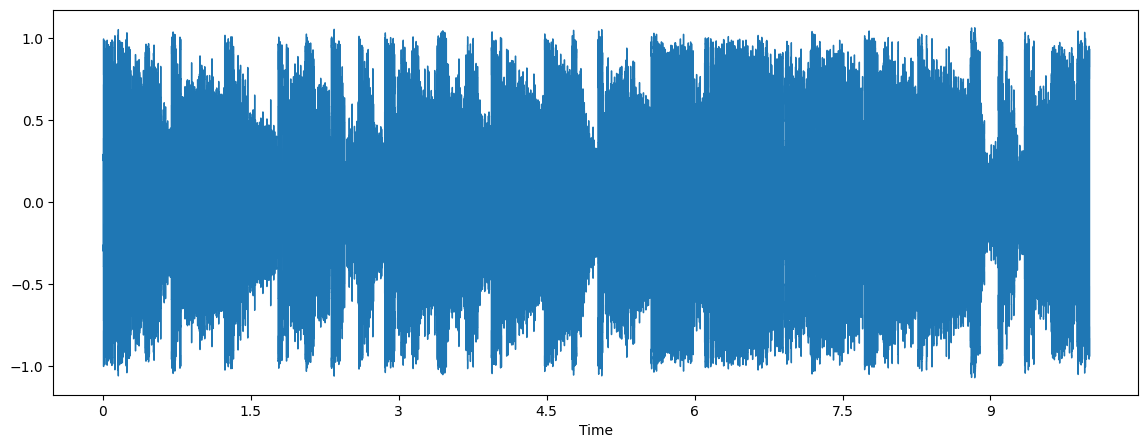

In [7]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(x,sr=sr)
ipd.Audio(data=x,rate=sr)

## 4. Short-Time Fourier Transform (STFT) and Spectrogram

Next, we transform the audio from the **time domain** to the **frequency domain** using a **Short-Time Fourier Transform (STFT)**:

1. **STFT (`librosa.stft`)** converts the 1D audio signal `x` into a 2D complex-valued array `X`, where:
   - Rows → frequency bins  
   - Columns → time frames  
   - Values → complex numbers encoding magnitude and phase

2. **Convert to decibels (`librosa.amplitude_to_db`)** to visualize the amplitude in a human-friendly logarithmic scale.

Finally, we plot the **spectrogram**, showing how frequency content changes over time.


x (before short time fourier transform):

 [-0.21847306 -0.29521254 -0.28723544 ...  0.23577482  0.16443446
  0.06488758]


X (after short time fourier transform:

[[-1.5471245e+01+0.0000000e+00j -9.2390804e+00+0.0000000e+00j
  -4.0373886e-01+0.0000000e+00j ... -3.8890896e+00+0.0000000e+00j
  -1.7559245e-01+0.0000000e+00j  1.2369475e+01+0.0000000e+00j]
 [ 1.6356213e+01-2.8145556e+00j  1.3514967e+00+9.6242762e+00j
   1.6633058e+00-3.5675099e-01j ...  1.4489313e+00+2.3455644e+00j
   3.6946704e+00+1.3222318e+00j -9.6697531e+00+1.1522857e+01j]
 [-1.7330202e+01+1.1651043e+01j  1.5338026e+01-2.3911798e-01j
   2.2302175e+00-1.5024911e+00j ...  5.0050101e+00-3.0968835e+00j
  -3.0571320e+00+3.1483037e+00j -6.6316211e-01-1.3499748e+01j]
 ...
 [ 5.4446519e-03+2.1515493e-03j -3.2576600e-03-1.0496490e-03j
  -1.9762908e-06-1.9867991e-06j ... -1.8197159e-05-1.1145526e-06j
  -2.2935043e-03+4.2013112e-03j  2.4730548e-02-4.5423482e-02j]
 [-5.4038223e-03-1.0749527e-03j -5.2565173e-04+3.2368498e-03j
  -1.

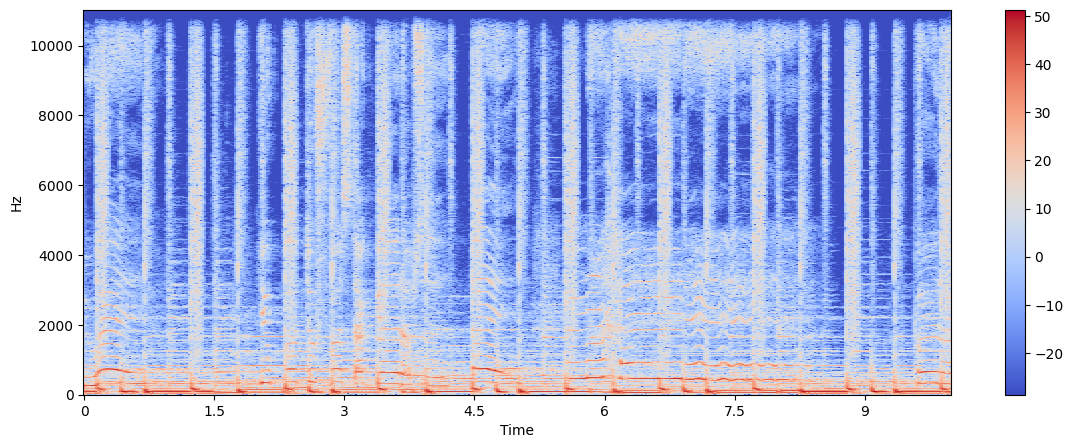

In [9]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
print(f"x (before short time fourier transform):\n\n {x}\n\n\nX (after short time fourier transform:\n\n{X}\n\n")
print(f"\n\n\nXdb (after conversion to amplitude and phase):]\n\n{Xdb}")

## 5. Generate a Pure Sine Wave

We can also **synthesize audio** directly in Python without loading a file.  

In this example, we generate a **pure sine wave**:

- `sr` → sample rate (number of samples per second)  
- `T` → duration of the signal in seconds  
- `t` → time vector, equally spaced from 0 to `T`  
- `x` → audio signal, here a sine wave at **220 Hz** (A3 note), scaled to 0.5 amplitude


In [10]:
sr = 22050 # sample rate
T = 15.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
ipd.Audio(x, rate=sr)

## 6. Feature Extraction: Zero-Crossing Rate (ZCR)

One common feature in audio analysis is the **Zero-Crossing Rate (ZCR)**, which measures how frequently a signal **changes sign** (from positive to negative or vice versa).  

- ZCR is widely used in **speech recognition** and **music information retrieval**.  
- Percussive or noisy sounds (like drums or rock music) tend to have **higher ZCR** values.  
- By examining a small segment of the audio, we can see **how many zero-crossings occur**, giving insight into the signal's **texture**.

In the code below:
1. We **load a segment of audio**.  
2. We **visualize the waveform**.  
3. We **zoom in** to inspect a short portion.  
4. We **compute the number of zero-crossings** in that small segment.


6


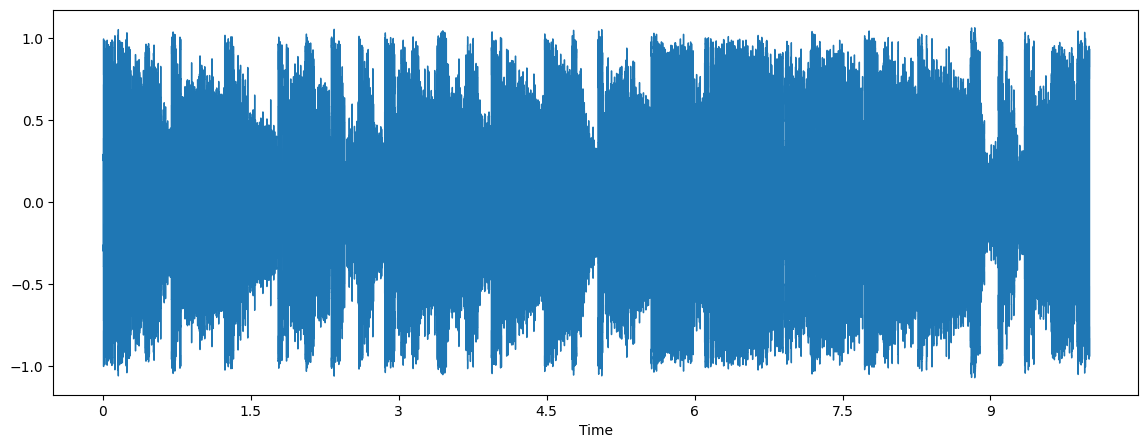

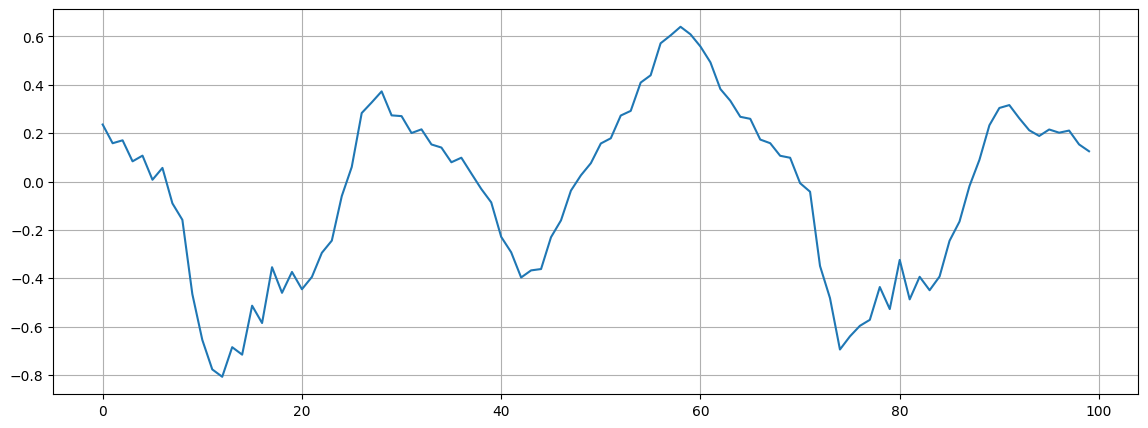

In [11]:
# Load the signal
x, sr = librosa.load(audio_path,offset=30.0,duration=10)

#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

## 7. Feature Extraction: Spectral Centroid

The **Spectral Centroid** indicates where the "center of mass" of the spectrum is located, providing a measure of the **brightness** of a sound.  

- A higher spectral centroid generally corresponds to **brighter or sharper sounds**.  
- Lower spectral centroid values indicate **darker or bass-heavy sounds**.  
- This feature is widely used in **music information retrieval** and **audio classification**.  

In this section, we:
1. Compute the **spectral centroid** for the audio segment.  
2. Normalize the values for easier visualization.  
3. Plot the **spectral centroid over time** on top of the waveform.


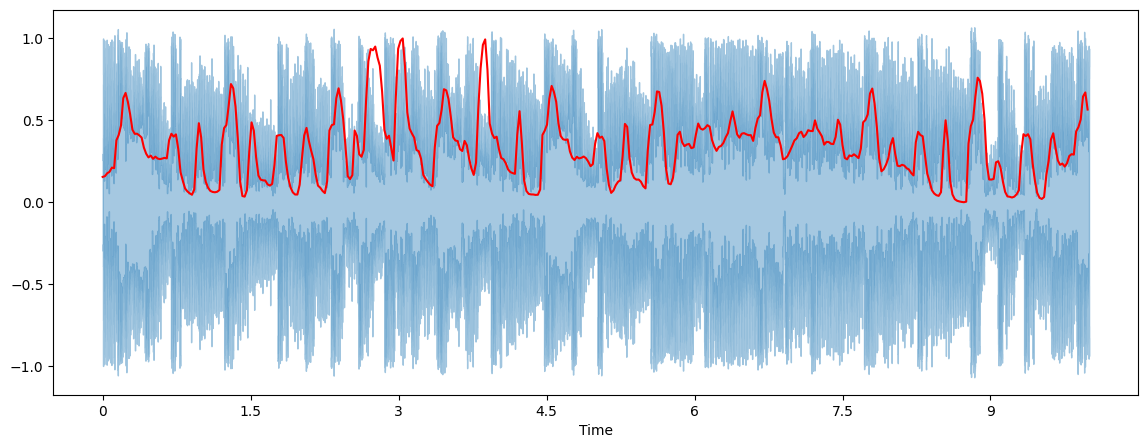

In [14]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

# Listen to the song
ipd.Audio(data=x,rate=sr)

## 8. Feature Extraction: Spectral Rolloff

The **Spectral Rolloff** is a feature that describes the **shape of the spectrum**:

- It represents the frequency below which a specified percentage of the **total spectral energy** is contained (commonly 85%).  
- This feature is useful for distinguishing between **harmonic/bass-heavy sounds** and **bright/percussive sounds**.  
- Spectral rolloff is widely used in **music information retrieval** and **audio classification**.

In this section, we:
1. Compute the spectral rolloff for the audio signal.  
2. Normalize the values for easier visualization.  
3. Plot the **spectral rolloff over time** on top of the waveform.


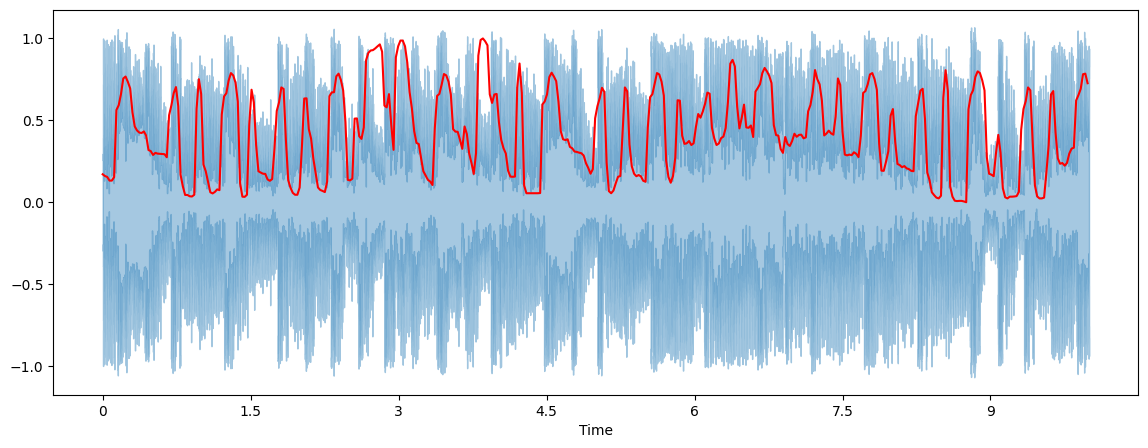

In [18]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## 9. Feature Extraction: Mel-Frequency Cepstral Coefficients (MFCCs)

**Mel-Frequency Cepstral Coefficients (MFCCs)** are a compact representation of the **spectral envelope** of a signal:

- Usually **10–20 coefficients** are computed per frame.  
- MFCCs model characteristics of the **human voice**, making them widely used in **speech recognition** and **music analysis**.  
- They summarize the overall shape of the spectrum while reducing dimensionality.

In this example, we work with a **simple loop audio file**, compute its MFCCs, and visualize them:

1. Extract MFCCs from the previously loaded audio file.  
2. Display the waveform.  
3. Compute MFCCs using `librosa.feature.mfcc`.  
4. Visualize MFCCs as a spectrogram.  
5. Optionally, perform **feature scaling** to normalize each coefficient dimension to **zero mean and unit variance**.


(20, 431)
[-8.8508054e-09  6.6381043e-09 -4.4254027e-09  1.7701611e-08
 -8.8508054e-09  0.0000000e+00  0.0000000e+00  8.8508054e-09
 -8.8508054e-09  8.8508054e-09  8.8508054e-09 -8.8508054e-09
  1.7701611e-08 -4.4254027e-09  1.7701611e-08 -1.7701611e-08
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
[0.99999994 1.         1.         1.0000001  1.         0.9999999
 0.9999999  1.0000001  1.         1.0000001  0.9999999  1.0000001
 1.0000001  1.         0.99999994 0.99999994 1.0000001  1.0000001
 1.         0.9999999 ]


/home/winzer/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:265: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/winzer/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:284: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


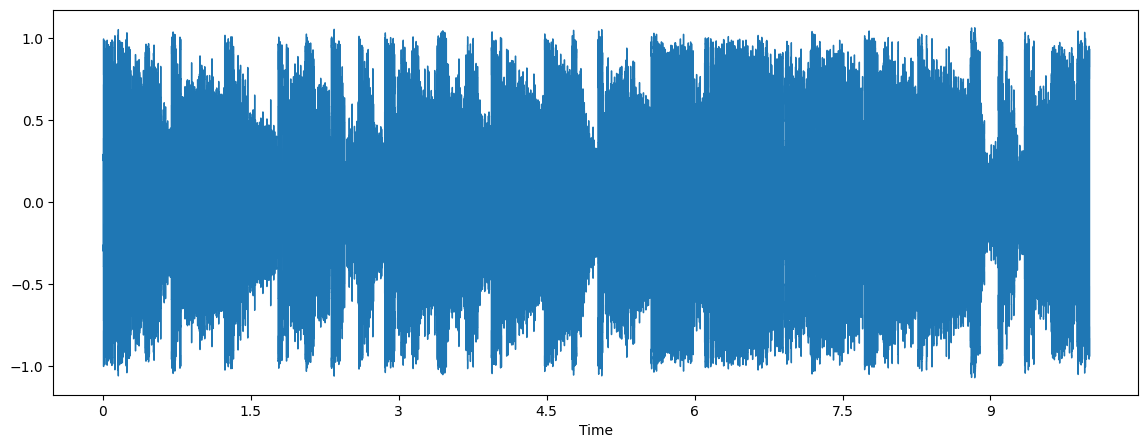

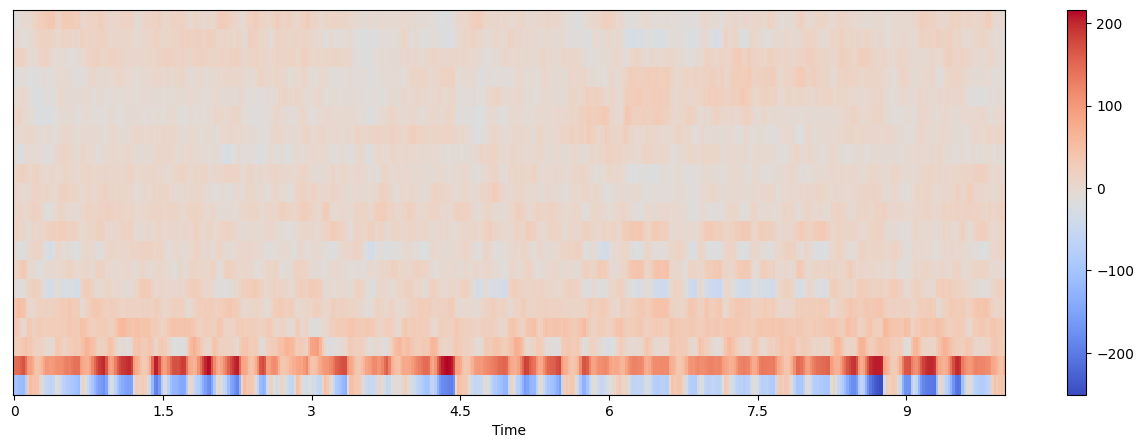

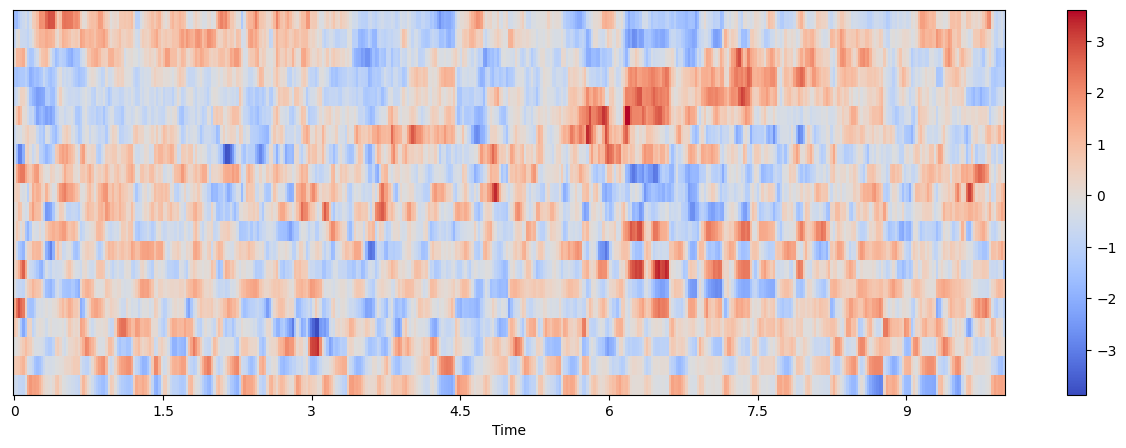

In [36]:
x, sr = librosa.load(audio_path,offset=30,duration=10)
plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr=sr)

mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(16,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()


# Feature scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
plt.figure(figsize=(16,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()

## 10. Feature Extraction: Chroma Frequencies

**Chroma features** represent the distribution of energy across the **12 semitone pitch classes** (C, C#, D, ..., B) in the musical octave.

- They capture the **harmonic and melodic content** of a signal while being **invariant to octave changes**.  
- Useful in **chord recognition**, **key detection**, and **music similarity analysis**.  
- Each chroma bin corresponds to a specific note, showing how its intensity varies over time.

In this example, we:

1. Load a piano audio file (`simple_piano.wav`).  
2. Define a `hop_length` for frame spacing.  
3. Compute chroma features using `librosa.feature.chroma_stft`.  
4. Visualize the **chromagram**, showing the strength of each pitch class over time.


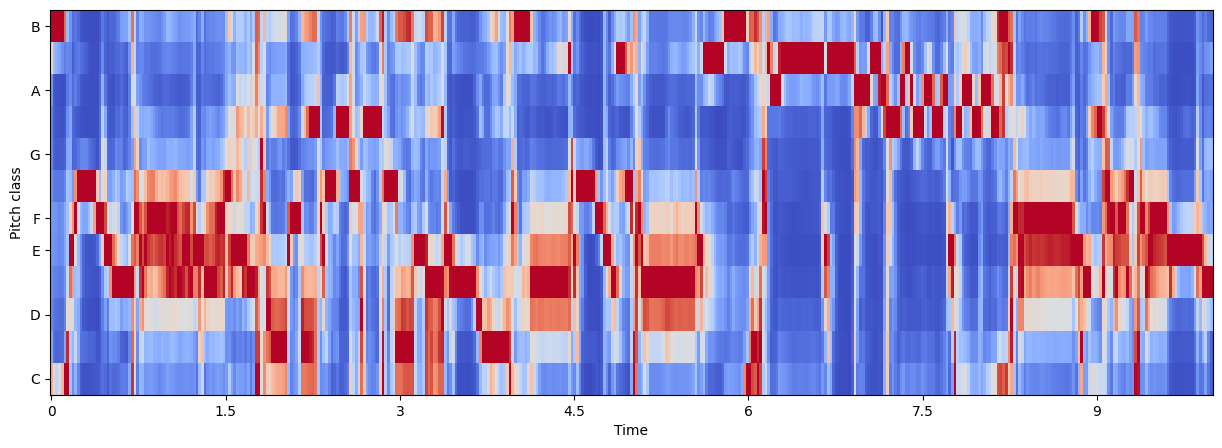

In [41]:
x, sr = librosa.load(audio_path,offset=30,duration=10)


hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
ipd.Audio(data=x,rate=sr)

## 11. Feature Extraction: Harmonic and Percussive Source Separation (HPSS)

**Harmonic–Percussive Source Separation (HPSS)** decomposes an audio signal into:

- **Harmonic components**: tonal, sustained parts (melody, chords).  
- **Percussive components**: transient, rhythmic parts (drums, beats).  

### Steps in this example:

1. **Load audio** (`y, sr`) for a short segment of 10 seconds.  
2. **Compute the STFT** to get the complex spectrogram (magnitude + phase).  
3. **Apply HPSS** on the magnitude spectrogram to separate harmonic (`H_mag`) and percussive (`P_mag`) features.  
4. **Reconstruct time-domain signals** by combining separated magnitudes with the original phase (`y_harm`, `y_perc`).  
5. **Visualize the waveforms** to compare harmonic and percussive content.

This allows **independent analysis of melody and rhythm**, useful for **beat detection, music transcription, and vocal or instrument isolation**.


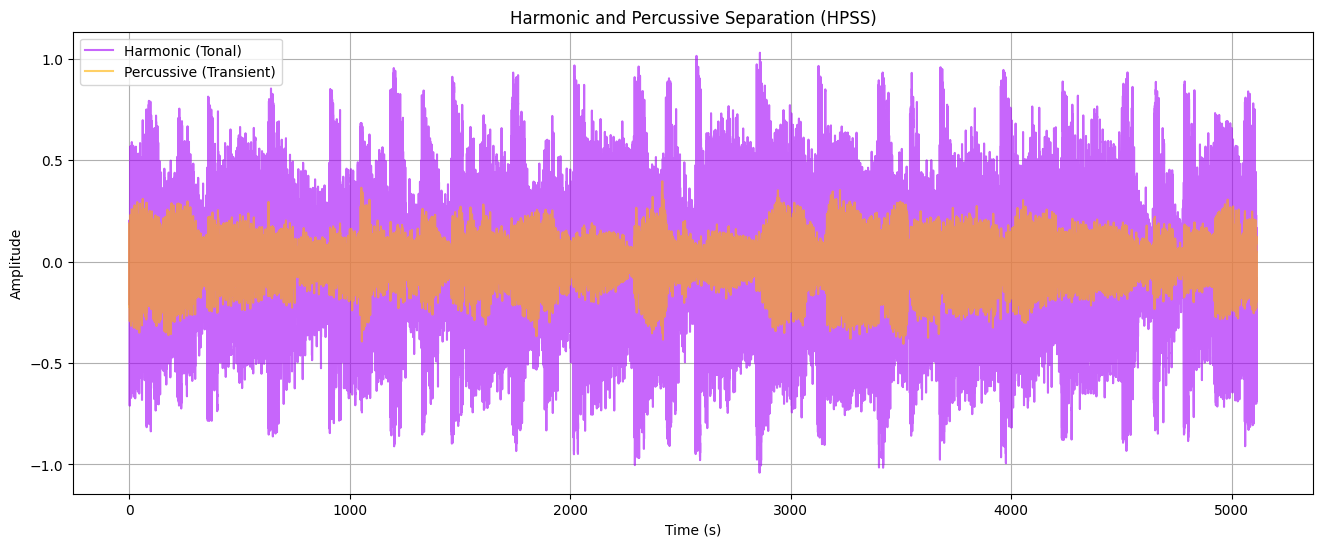

In [52]:
y, sr = librosa.load(audio_path,offset=30, duration=10)

# 2. Compute the Spectrogram (Required input for hpss)
# We calculate the complex STFT to save the phase, and the magnitude for hpss
D = librosa.stft(y)
D_magnitude = np.abs(D)
D_phase = np.angle(D)

# 3. Apply HPSS to the Magnitude Spectrogram
# H_mag and P_mag are the separated magnitude spectrograms
H_mag, P_mag = librosa.effects.hpss(D_magnitude)

# 4. Inverse STFT to Reconstruct Time-Domain Signals
# We combine the separated magnitude with the original phase to reconstruct audio
y_harm = librosa.istft(H_mag * np.exp(1j * D_phase))
y_perc = librosa.istft(P_mag * np.exp(1j * D_phase))

# 5. Display the Separated Waveforms
plt.figure(figsize=(16, 6))

# Generate the time axis for plotting
time = librosa.times_like(y_harm, sr=sr)

# Plot Harmonic component (purple)
plt.plot(time, y_harm, color='#A300F9', alpha=0.6, label='Harmonic (Tonal)')

# Plot Percussive component (yellow/orange)
plt.plot(time, y_perc, color='#FFB100', alpha=0.6, label='Percussive (Transient)')

plt.title('Harmonic and Percussive Separation (HPSS)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
ipd.Audio(data=y,rate=sr)